In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

## import data

In [2]:
data = pd.read_csv("train.csv")
data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [3]:
data.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


## Get feature and label

In [4]:
feat_columns = data.columns[1:-1]
X = data[feat_columns].values
y = data['target'].values

In [5]:
X.shape, y.shape

((61878, 93), (61878,))

## Data analysis

In [7]:
data['target'].value_counts()

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64

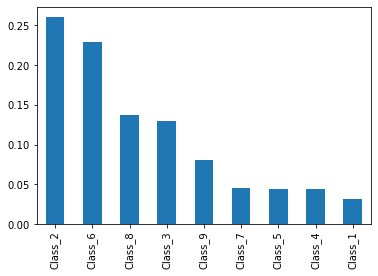

In [8]:
(data['target'].value_counts() / data['target'].count()).plot(kind='bar')
plt.show()

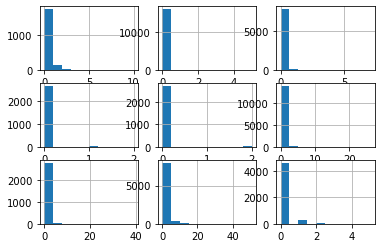

In [11]:
for idx in range(9):
    plt.subplot(3, 3, idx + 1)
    data[data['target'] == 'Class_{}'.format(idx+1)]['feat_2'].hist()
plt.show()

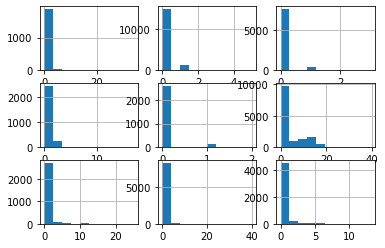

In [12]:
for idx in range(9):
    plt.subplot(3, 3, idx + 1)
    data[data['target'] == 'Class_{}'.format(idx+1)]['feat_60'].hist()
plt.show()

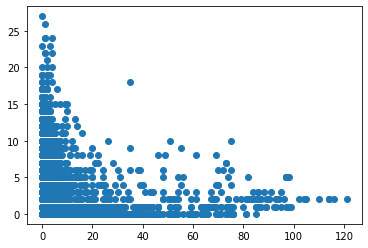

In [13]:
plt.scatter(data.feat_19, data.feat_20)

In [14]:
data[feat_columns].corr()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
feat_1,1.000000,0.031332,-0.027807,-0.027529,0.042973,0.043603,0.298952,0.056321,-0.032285,0.097776,...,0.049634,-0.008739,0.107947,0.089374,0.020830,0.096851,0.010310,0.037264,0.054777,0.081783
feat_2,0.031332,1.000000,0.082573,0.134987,0.020926,0.041343,0.222386,0.019815,-0.025630,0.051925,...,0.009845,-0.006764,-0.039090,0.047451,-0.047035,0.105527,0.515022,0.026383,-0.008219,0.054593
feat_3,-0.027807,0.082573,1.000000,0.583523,0.010880,0.004288,0.001294,-0.053462,-0.063551,0.036944,...,0.011159,-0.048626,-0.096093,-0.009838,-0.082336,0.174781,-0.015068,-0.012417,0.066921,0.006814
feat_4,-0.027529,0.134987,0.583523,1.000000,0.017290,0.014059,0.014490,-0.046184,-0.046250,0.059514,...,0.005684,-0.033153,-0.071029,0.005055,-0.067484,0.183715,0.009454,-0.010312,0.087631,0.015746
feat_5,0.042973,0.020926,0.010880,0.017290,1.000000,0.145355,0.075047,0.035861,-0.024708,0.091324,...,0.467329,0.034062,0.013879,0.013999,-0.019201,0.119951,0.004842,0.012012,0.065331,0.002038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feat_89,0.096851,0.105527,0.174781,0.183715,0.119951,0.035042,0.063511,0.007974,-0.019147,0.061498,...,0.103643,0.053582,-0.011822,0.066008,-0.022552,1.000000,0.027764,0.015917,0.129622,0.030650
feat_90,0.010310,0.515022,-0.015068,0.009454,0.004842,0.054034,0.129578,0.026807,-0.020698,0.049908,...,-0.006013,-0.003931,-0.019803,0.014696,-0.031679,0.027764,1.000000,0.014812,-0.035311,0.039864
feat_91,0.037264,0.026383,-0.012417,-0.010312,0.012012,0.012465,0.068506,0.095990,-0.014742,0.024025,...,-0.003444,-0.023091,-0.024005,0.028850,-0.033653,0.015917,0.014812,1.000000,0.104226,-0.000045
feat_92,0.054777,-0.008219,0.066921,0.087631,0.065331,0.015479,-0.032261,0.013608,-0.069707,-0.006869,...,0.048431,-0.043484,-0.049393,0.001424,-0.070120,0.129622,-0.035311,0.104226,1.000000,-0.003653


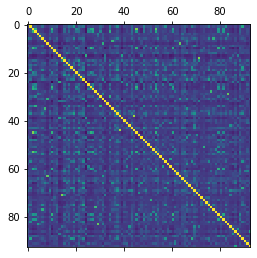

In [15]:
plt.matshow(data[feat_columns].corr())
plt.show()

## train model

In [18]:
# MLP
model = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(30, 10), random_state = 1, verbose = True) #alpha regularization
model.fit(X, y)

Iteration 1, loss = 1.21742568
Iteration 2, loss = 0.71613100
Iteration 3, loss = 0.65364569
Iteration 4, loss = 0.62344008
Iteration 5, loss = 0.60421866
Iteration 6, loss = 0.59073275
Iteration 7, loss = 0.57962391
Iteration 8, loss = 0.57041744
Iteration 9, loss = 0.56257974
Iteration 10, loss = 0.55571443
Iteration 11, loss = 0.55014136
Iteration 12, loss = 0.54500769
Iteration 13, loss = 0.54119924
Iteration 14, loss = 0.53746217
Iteration 15, loss = 0.53419837
Iteration 16, loss = 0.53038664
Iteration 17, loss = 0.52826131
Iteration 18, loss = 0.52459399
Iteration 19, loss = 0.52338942
Iteration 20, loss = 0.52086216
Iteration 21, loss = 0.51870945
Iteration 22, loss = 0.51635183
Iteration 23, loss = 0.51408028
Iteration 24, loss = 0.51270803
Iteration 25, loss = 0.51159978
Iteration 26, loss = 0.51026242
Iteration 27, loss = 0.50816111
Iteration 28, loss = 0.50709106
Iteration 29, loss = 0.50565495
Iteration 30, loss = 0.50448105
Iteration 31, loss = 0.50370593
Iteration 32, los

C:\Users\Lisa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(30, 10), random_state=1,
              verbose=True)

In [19]:
model.intercepts_ # one intercept for each perceptron

[array([ 1.36756969,  0.35732759,  0.38931287,  2.07044153,  2.2630807 ,
         1.43110374, -0.71558976,  0.17407029,  0.96810552,  1.56343376,
         1.03334218,  0.89212504,  1.03867528, -0.97950474,  0.97027034,
         0.3211223 ,  0.89755421, -0.50983839,  1.2646765 ,  0.26889786,
         1.17604849,  1.43069789,  0.66642811,  0.79413145,  0.31726184,
        -0.50160683,  0.78193152,  0.89605831,  0.44847882,  0.85561725]),
 array([ 0.83537417,  1.25606786,  0.92559538,  0.23741464,  0.35648162,
         0.40202474,  0.55302056,  1.18086543, -0.193972  ,  0.94658174]),
 array([ 0.39203422, -0.38683814,  0.19573574, -0.31646798, -0.33030396,
        -0.37082561,  0.2597092 ,  1.30643848,  0.08432105])]

In [22]:
model.coefs_[0].shape

(93, 30)

## testing

In [23]:
test = pd.read_csv("test.csv")

In [26]:
X_test = test[feat_columns].values
X_test.shape

(144368, 93)

In [28]:
prob = model.predict_proba(X_test)
prob

array([[1.25904515e-05, 1.72928878e-01, 1.35741477e-01, ...,
        5.97684314e-03, 6.66773112e-09, 9.86079292e-06],
       [1.09536513e-05, 6.08470379e-07, 1.66877121e-07, ...,
        1.05773699e-04, 1.40283546e-03, 1.73398483e-05],
       [2.24930359e-08, 1.44260275e-12, 2.97488485e-14, ...,
        3.08141247e-07, 1.95130008e-07, 1.72262421e-08],
       ...,
       [5.02347860e-07, 6.45038860e-01, 3.39828634e-01, ...,
        4.10701443e-03, 1.20157423e-06, 2.14440160e-11],
       [1.82861148e-06, 4.91985533e-01, 4.63070912e-02, ...,
        2.10202849e-05, 2.73487185e-09, 2.62381652e-04],
       [1.16728262e-04, 4.54645560e-01, 4.34507029e-01, ...,
        3.09561364e-02, 2.03271413e-07, 2.61238827e-07]])

In [29]:
prob[0]

array([1.25904515e-05, 1.72928878e-01, 1.35741477e-01, 6.85232903e-01,
       3.11471066e-09, 9.74388634e-05, 5.97684314e-03, 6.66773112e-09,
       9.86079292e-06])